In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patients =  pd.read_csv('physionet.org/files/mimiciii/1.4/PATIENTS.csv.gz')
cpt =  pd.read_csv('physionet.org/files/mimiciii/1.4/D_CPT.csv.gz')
cpt_event =  pd.read_csv('physionet.org/files/mimiciii/1.4/CPTEVENTS.csv.gz') 
admission = pd.read_csv('physionet.org/files/mimiciii/1.4/ADMISSIONS.csv')
drug =  pd.read_csv('physionet.org/files/mimiciii/1.4/PRESCRIPTIONS.csv.gz')
icu_stay =  pd.read_csv('physionet.org/files/mimiciii/1.4/ICUSTAYS.csv.gz')
ICU_TRANSFER = pd.read_csv('physionet.org/files/mimiciii/1.4/TRANSFERS.csv.gz')
# LAB_EVENT = pd.read_csv('physionet.org/files/mimiciii/1.4/LABEVENTS.csv.gz')
D_LAB = pd.read_csv('physionet.org/files/mimiciii/1.4/D_LABITEMS.csv.gz')
# MICRO_EVENT = pd.read_csv('physionet.org/files/mimiciii/1.4/MICROBIOLOGYEVENTS.csv.gz')
DATETIME_EVENT = pd.read_csv('physionet.org/files/mimiciii/1.4/DATETIMEEVENTS.csv.gz')
D_ITEMS=pd.read_csv('physionet.org/files/mimiciii/1.4/D_ITEMS.csv.gz')
D_ITEMS = D_ITEMS.dropna(subset=['ITEMID','LABEL'])

/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# surg_CHARTEVENT=pd.read_csv('surg_CHARTEVENT.csv')
CHARTEVENT = pd.read_csv('physionet.org/files/mimiciii/1.4/CHARTEVENTS.csv') 
# procedure = pd.read_csv('physionet.org/files/mimiciii/1.4/PROCEDUREEVENTS_MV.csv.gz') 
input_mv = pd.read_csv('physionet.org/files/mimiciii/1.4/INPUTEVENTS_MV.csv.gz') 
input_cv = pd.read_csv('physionet.org/files/mimiciii/1.4/INPUTEVENTS_CV.csv.gz') 

/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
D_ICD_diag=pd.read_csv('physionet.org/files/mimiciii/1.4/D_ICD_DIAGNOSES.csv.gz')
D_ICD_diag = D_ICD_diag.drop(D_ICD_diag.columns[0],axis=1)

D_ICD_proc=pd.read_csv('physionet.org/files/mimiciii/1.4/D_ICD_PROCEDURES.csv.gz', dtype={'ICD9_CODE': str})
D_ICD_proc = D_ICD_proc.drop(D_ICD_proc.columns[0],axis=1)

diag_icd = pd.read_csv('physionet.org/files/mimiciii/1.4/DIAGNOSES_ICD.csv.gz')
diag_icd = diag_icd.drop(diag_icd.columns[0],axis=1)
diag_icd = diag_icd.merge(D_ICD_diag,on='ICD9_CODE')
diag_icd = diag_icd.rename(columns={'SEQ_NUM':'DIAG_SEQ_NUM',
                                    'ICD9_CODE':'DIA_ICD9_CODE','SHORT_TITLE':'DIAG_SHORT_TITLE',
                                   'LONG_TITLE':'DIAG_LONG_TITLE'})

def process_code(code):
    if code.startswith('E') or code.startswith('V'):
        return code[:1]
    else:
        return code[:3]

diag_icd['ICD9'] = diag_icd['DIA_ICD9_CODE'].apply(process_code)

proc_icd = pd.read_csv('physionet.org/files/mimiciii/1.4/PROCEDURES_ICD.csv.gz',dtype={'ICD9_CODE': str})
proc_icd = proc_icd.drop(proc_icd.columns[0],axis=1)
proc_icd = proc_icd.merge(D_ICD_proc,on='ICD9_CODE')
proc_icd = proc_icd.rename(columns={'SEQ_NUM':'PROC_SEQ_NUM','ICD9_CODE':'PROC_ICD9_CODE',
                                   'SHORT_TITLE':'PROC_SHORT_TITLE',
                                   'LONG_TITLE':'PROC_LONG_TITLE'})

In [5]:
### Define Cohort

In [ ]:
Surgery_cpteve = cpt_event[cpt_event.SECTIONHEADER=='Surgery'].reset_index(drop=True)
# # Surgery_cpteve = Surgery_cpteve

# group = Surgery_cpteve.groupby('HADM_ID',as_index=False).SUBSECTIONHEADER.nunique()
# multi_surgery = group[group.SUBSECTIONHEADER>1]
# single_surgery = group[group.SUBSECTIONHEADER==1]
# single_surg = Surgery_cpteve[Surgery_cpteve.HADM_ID.isin(single_surgery.HADM_ID)]



surgery_hadm = single_surg.HADM_ID.unique()
# surgery_subject = single_surg.SUBJECT_ID.unique()
surg_hadm = Surgery_cpteve.HADM_ID.unique()
# surgery_subject = Surgery_cpteve.SUBJECT_ID.unique()




def MapHADM(table,hadmid=surg_hadm):
    table1 = table[table.HADM_ID.isin(hadmid)]
    return(table1)



icu_surg = MapHADM(icu_stay).drop(['ROW_ID'],axis=1)                
# surg_CHARTEVENT = CHARTEVENT.merge(icu_surg[['SUBJECT_ID','HADM_ID',
#                                                 'ICUSTAY_ID']], 
#                                         on=['SUBJECT_ID','HADM_ID',
#                                             'ICUSTAY_ID'], how='left')
surg_CHARTEVENT = CHARTEVENT[CHARTEVENT.HADM_ID.isin(surgery_hadm)]


# surgery_subject = surg_CHARTEVENT.SUBJECT_ID.unique()
# surgery_hadm = surg_CHARTEVENT.HADM_ID.unique()



service = pd.read_csv('physionet.org/files/mimiciii/1.4/SERVICES.csv.gz')
surg_service = service[service.CURR_SERVICE.str.contains('SURG')| 
        (service.CURR_SERVICE.isin(["ORTHO"]))]

surgery_hadm = surg_service[surg_service.HADM_ID.isin(Surgery_cpteve.HADM_ID)].HADM_ID.unique()




In [ ]:
# cpt_event[cpt_event.CPT_NUMBER.isin(range(100,2001))]
# CPT_NUMBER

# cpt_event[(cpt_event.SECTIONHEADER=="Anesthesia")]

# cpt_event.CPT_NUMBER.describe()
# cpt[:50]
# len(surgery_hadm)

# Surgery_cpteve.groupby(['CPT_NUMBER','SUBSECTIONHEADER']).agg({'HADM_ID':'nunique'}).to_csv('CPT for surgery.csv')

ss = surg_service[surg_service.HADM_ID.isin(surgery_hadm)]
ss = ss[-(ss.duplicated('HADM_ID', keep=False))]
# ss[ss.CURR_SERVICE=='SURG']

ss.merge(Surgery_cpteve[['HADM_ID','CPT_NUMBER','TICKET_ID_SEQ','SUBSECTIONHEADER']],
         on='HADM_ID',how='inner').groupby(['CURR_SERVICE','SUBSECTIONHEADER','CPT_NUMBER']).agg({'HADM_ID':'nunique'})
# .to_csv('CPT for surgery.csv')


# sss = ss[-(ss.duplicated('HADM_ID', keep=False))].merge(Surgery_cpteve[['HADM_ID','SUBSECTIONHEADER']],
#                                                   on='HADM_ID',how='inner').drop_duplicates()
# .to_csv('CPT for surgery.csv')
# .HADM_ID.nunique()


# multi_cpt_id = sss[sss.duplicated('HADM_ID', keep=False)].HADM_ID.unique()
# len(multi_cpt_id)
# ss[ss.HADM_ID.isin(multi_cpt_id)]
# .merge(Surgery_cpteve[['HADM_ID','CPT_CD','TICKET_ID_SEQ','SUBSECTIONHEADER']])



Surgery_cpteve.HADM_ID.nunique()

In [ ]:
# cpt_event[cpt_event.CPT_CD=="00100"]
# cpt_event[cpt_event.SECTIONHEADER=="Anesthesia"]
# proc_icd
# D_ICD_proc.to_csv("ICD-proc.csv")

# Surgery_cpteve
# ss.merge(Surgery_cpteve[['HADM_ID','CPT_NUMBER','TICKET_ID_SEQ','SUBSECTIONHEADER']],
#          on='HADM_ID',how='inner')[:50]

In [7]:
service = pd.read_csv('physionet.org/files/mimiciii/1.4/SERVICES.csv.gz')


surg_service = service[service.CURR_SERVICE.str.contains('SURG')| 
        (service.CURR_SERVICE.isin(["ORTHO"]))]


group = surg_service.groupby('HADM_ID',as_index=False).CURR_SERVICE.nunique()
multi_surgery = group[group.CURR_SERVICE>1]
single_surgery = group[group.CURR_SERVICE==1]

single_surg = surg_service[surg_service.HADM_ID.isin(single_surgery.HADM_ID)]

# surgery_hadm = surg_service.HADM_ID.unique()
# surgery_subject = surg_service.SUBJECT_ID.unique()
surgery_hadm = single_surg.HADM_ID.unique()
surgery_subject = single_surg.SUBJECT_ID.unique()


def MapHADM(table,hadmid=surgery_hadm):
    table1 = table[table.HADM_ID.isin(hadmid)]
    return(table1)

                
    
icu_surg = MapHADM(icu_stay).drop(['ROW_ID'],axis=1)     
# surg_CHARTEVENT = CHARTEVENT.merge(icu_surg[['SUBJECT_ID','HADM_ID',
#                                                 'ICUSTAY_ID']], 
#                                         on=['SUBJECT_ID','HADM_ID',
#                                             'ICUSTAY_ID'], how='inner')

surg_CHARTEVENT = CHARTEVENT[CHARTEVENT.HADM_ID.isin(surgery_hadm)]
surg_CHARTEVENT.to_csv("surg_CHARTEVENT.csv")

# surgery_subject = surg_CHARTEVENT.SUBJECT_ID.unique()
# surgery_hadm = surg_CHARTEVENT.HADM_ID.unique()

len(surgery_hadm)


20065

In [8]:
surg_service[surg_service.HADM_ID.isin(surgery_hadm)].groupby('CURR_SERVICE').agg({'HADM_ID':'nunique'})

,HADM_ID
CURR_SERVICE,
CSURG,7569
NSURG,3952
ORTHO,923
PSURG,206
SURG,4997
TSURG,1184
VSURG,1234


In [ ]:
# single_surg[single_surg.HADM_ID.isin(surgery_hadm)].to_csv("surgery service.csv")
# surg_CHARTEVENT.to_csv("surg_CHARTEVENT.csv")


In [19]:
# surg_CHARTEVENT.HADM_ID.nunique()


D_ITEMS[D_ITEMS.LABEL.str.contains("Heart Rate")]
# 3494,220047,211,220045
surg_CHARTEVENT[surg_CHARTEVENT.ITEMID.isin([211,220045])].VALUENUM.describe()
# .HADM_ID.nunique()

# surg_CHARTEVENT[surg_CHARTEVENT.ITEMID.isin([220047])]
# .HADM_ID.nunique()


# .HADM_ID.nunique()
# surg_service.HADM_ID.nunique()
# len(surgery_hadm)
# service = service[service.HADM_ID.isin(surgery_hadm)]
# admission[admission.HADM_ID.isin(surgery_hadm)]

# surg_service = service[(service.CURR_SERVICE.str.contains("SURG")) | 
#         (service.CURR_SERVICE.isin(["ORTHO"]))]


# cpt_event[-cpt_event.HADM_ID.isin(surgery_hadm) &]

# service[service.HADM_ID == 183725]
# cpt_event[(-(cpt_event.HADM_ID.isin(surg_service.HADM_ID))) & (cpt_event.HADM_ID.isin(Surgery_cpteve.HADM_ID))]
# cpt_event[(cpt_event.HADM_ID.isin(surg_service.HADM_ID)) & (cpt_event.HADM_ID.isin(Surgery_cpteve.HADM_ID))]
# cpt_event[(cpt_event.HADM_ID.isin(surgery_hadm)) & (-(cpt_event.HADM_ID.isin(Surgery_cpteve.HADM_ID)))]
# .HADM_ID.nunique()


# cpt_event[cpt_event.HADM_ID==164735]
# icu_stay[icu_stay.HADM_ID==164735]
# Surgery_cpteve[(Surgery_cpteve.CPT_NUMBER==36620.0) & Surgery_cpteve.HADM_ID.isin(surgery_hadm)]





# cpt_event[cpt_event.SECTIONHEADER.fillna("").str.lower().str.contains("anesthesia")].SUBSECTIONHEADER.unique()
# cpt_event[(cpt_event.CPT_NUMBER>100) & (cpt_event.CPT_NUMBER<1999)]
# D_ITEMS[D_ITEMS.LABEL.str.lower().str.contains("propofol|anesth")]
# input_cv[input_cv.ITEMID.isin([30131])]
# input_mv[input_mv.ITEMID.isin([222168])]
# surg_CHARTEVENT[surg_CHARTEVENT.ITEMID.isin([6238,227210,224469])]




# proc_icd[proc_icd.PROC_LONG_TITLE.str.lower().str.contains("anesth")]
# .PROC_LONG_TITLE.unique()

# proc_icd

# set(proc_icd[proc_icd.HADM_ID.isin(iddd)].PROC_LONG_TITLE.unique())

# proc_icd[proc_icd.HADM_ID==183725]


count    2.848760e+06
mean     9.023723e+01
std      5.924752e+03
min     -1.000000e+00
25%      7.500000e+01
50%      8.500000e+01
75%      9.700000e+01
max      9.999999e+06
Name: VALUENUM, dtype: float64

In [ ]:
# D_ICD_proc
# D_ICD_proc[D_ICD_proc.ICD9_CODE=='331']

In [8]:
def raw_data():

    
    ##    demographic
    admission_surg = admission[admission.HADM_ID.isin(surgery_hadm)]
    demo = admission_surg.drop(['ROW_ID','HOSPITAL_EXPIRE_FLAG','HOSPITAL_EXPIRE_FLAG'],axis=1)
    demo = demo.merge(patients.drop(['ROW_ID'],axis=1),on='SUBJECT_ID',how='left')

    
    
    # Get Age
    DOB = [datetime.datetime.strptime(demo.DOB.values[i], "%Y-%m-%d %H:%M:%S").date() for i in range(demo.shape[0])]
    DOA = [datetime.datetime.strptime(demo.ADMITTIME.values[i], "%Y-%m-%d %H:%M:%S").date() for i in range(demo.shape[0])]
    age = pd.Series([round((DOA[i] -DOB[i]).days/365) for i in range(demo.shape[0])])
    demo['AGE'] = age
    demo.insert(3, 'AGE', demo.pop('AGE'))
    demo.insert(6, 'INSURANCE', demo.pop('INSURANCE'))
    demo.insert(7, 'GENDER', demo.pop('GENDER'))
    demo.insert(8,'ETHNICITY',demo.pop('ETHNICITY'))
    demo.insert(9, 'RELIGION',demo.pop('RELIGION'))
    demo.insert(10,'MARITAL_STATUS',demo.pop('MARITAL_STATUS'))
    
    hadm_record = demo
    
    
    
    
    ## ICU
    icu_info = icu_surg[['SUBJECT_ID','HADM_ID',
                     'ICUSTAY_ID','LOS','INTIME',
                     'OUTTIME','FIRST_CAREUNIT',
                     'LAST_CAREUNIT']].sort_values('HADM_ID').rename(columns={'LOS':'LOS(Day)'})
    icu_surg_agg = icu_info.groupby(['SUBJECT_ID','HADM_ID'],as_index=False).agg({'LOS(Day)':'sum',
                                                                                'INTIME':'first','OUTTIME':'last',
                                                                                            'FIRST_CAREUNIT':'first',
                                                                                         'LAST_CAREUNIT':'last'})
    hadm_record = demo.merge(icu_surg_agg,on=['SUBJECT_ID','HADM_ID'],how="left")
    
    
    
    
    
    ## weight
    weight = surg_CHARTEVENT[surg_CHARTEVENT.ITEMID.isin([762, 763, 
                                                      3580, 3581, 3582,3693,
                                                      224639,226512,226531])]
    weight = weight[weight.VALUENUM<700]
    weight = weight[weight.VALUENUM>0]
    weight = weight.merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
    weight.loc[weight['LABEL']=='Present Weight  (lb)', 'VALUENUM'] *= 0.45359237
    weight.loc[weight['LABEL']=='Present Weight  (lb)', 'VALUEUOM'] = 'kg'
    weight.loc[weight['LABEL']=='Present Weight  (oz)', 'VALUENUM'] *= 0.02834952
    weight.loc[weight['LABEL']=='Present Weight  (oz)', 'VALUEUOM'] = 'kg'
    weight.loc[weight['VALUEUOM']=='gms', 'VALUEUOM'] = 'kg' 
    weight = weight.dropna(subset=['VALUEUOM']).sort_values(by='CHARTTIME')
    # weight.rename(columns={'LABEL':'Weight_Label'})
    weight = weight.rename(columns={'VALUENUM':'Weight','LABEL':'Weight_Label'})
    weight_stat=weight.groupby('HADM_ID',as_index=False).agg({'SUBJECT_ID':'first',
                                                        'VALUEUOM':'first','Weight':['mean','min','max','std','size']})
    weight_stat.columns = [f'{col[0]}_{col[1]}' for col in weight_stat.columns]
    weight_stat = weight_stat.rename(columns={'HADM_ID_':'HADM_ID','SUBJECT_ID_first':'SUBJECT_ID',
                             'VALUEUOM_first':'WeightUnit','Weight_size':'Weight_N'})
    hadm_record = hadm_record.merge(weight_stat,on=['SUBJECT_ID','HADM_ID'],how='left')
    
    
    
    
    
    ## Height
    Height = surg_CHARTEVENT[surg_CHARTEVENT.ITEMID.isin(D_ITEMS[D_ITEMS.ITEMID.isin([920, 1394, 4187,
                                                                                  3486, 3485, 4188,
                                                                                 226707,226730])].ITEMID)]
#     Height = Height.dropna(subset=['VALUE','VALUENUM'])
    height = Height[Height.VALUENUM>0]
    height = height.merge(D_ITEMS[['ITEMID','LABEL']], on='ITEMID',how='left')
    height.loc[height['VALUEUOM'].isin(['Inch', 'Inches','inches']), 'VALUENUM'] *= 2.54
    height.loc[height['VALUEUOM'].isin(['Inch', 'Inches','inches']), 'VALUEUOM'] = 'cm'
    height = height.rename(columns={'VALUENUM':'Height'})
    stat = height.groupby('HADM_ID',as_index=False).agg({'SUBJECT_ID':'first','VALUEUOM':'first',
                                                         'Height':['mean','min','max','std','size']})
    stat.columns = [f'{col[0]}_{col[1]}' for col in stat.columns]
    stat = stat.rename(columns={'HADM_ID_':'HADM_ID','SUBJECT_ID_first':'SUBJECT_ID',
                            'VALUEUOM_first':'HeightUnit','Height_size':'Height_N'})
    hadm_record = hadm_record.merge(stat,on=['SUBJECT_ID','HADM_ID'],how='left')
    hadm_record["BMI"]= 10000*hadm_record['Weight_mean']/(hadm_record['Height_mean']**2)

    
    
    ## Pain Score
    PAIN=surg_CHARTEVENT[surg_CHARTEVENT['ITEMID'].isin([524,1044,227881,223791,225813])] #224409, 1045
    pain_acceptable = surg_CHARTEVENT[surg_CHARTEVENT['ITEMID'].isin([1089,223794])]
    pain = PAIN.merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
    mapping = {
    '0 / 10':0,
    '0-None': 0,
    '1-None to Mild':1,
    '2 / 10' : 2,
    '2-Mild':2,
    '3-Mild to Mod':3,
    '4-Mild to Mod':4,    
    '5 / 10':5,
    '5-Moderate':5,
    '6-Mod to Severe':6,
    '7-Mod to Severe':7,
    '8 / 10': 8,
    '8-Severe': 8,
    '9-Severe-Worst':9,
    '10 / 10': 10,
    '10-Worst': 10,
    'Unable to Score': None,
    'Unable to score': None}
    
    pain.loc[pain['VALUE'].isin(['Unable to score','Unable to Score']), 'VALUENUM'] = None
    for label in mapping.keys():
        pain.loc[pain.VALUE == label, 'VALUENUM'] = mapping[label]
        
    pain = pain.dropna(subset=['VALUE']) 
    pain_score = pain[pain.LABEL!='Baseline pain level'].dropna(subset=['VALUENUM'])
#     pain_score.to_csv("detailed pain score records_by_time.csv")
    pain_score = pain_score.rename(columns={'VALUENUM':'PainScore'})
    pain_stat = pain_score.groupby('HADM_ID',as_index=False).agg({'PainScore':['mean',
                                                                'max', 'min','std','count'],'SUBJECT_ID':'first'})
    pain_stat.columns = [f'{col[0]}_{col[1]}' for col in pain_stat.columns]
    pain_stat = pain_stat.rename(columns={'HADM_ID_':'HADM_ID','SUBJECT_ID_first':'SUBJECT_ID'})
    hadm_record = hadm_record.merge(pain_stat,on=['SUBJECT_ID','HADM_ID'],how='left')

    
    
    
    ## Baseline Pain
    baseline = pain.groupby('LABEL').get_group('Baseline pain level')
    baseline = baseline.rename(columns={'VALUENUM':'BaselinePainScore','VALUE':'BaselinePain'})
    baseline.loc[baseline.BaselinePain.isin(['Unable to Score','Unable to score']), 'BaselinePainScore'] = None
    baseline = baseline.dropna(subset=['BaselinePainScore'])
    baseline_stat = baseline.groupby('HADM_ID',as_index=False).agg({'BaselinePainScore':['mean','max','min','std','size'],
                                                     'SUBJECT_ID':'first'})
    baseline_stat.columns = [f'{col[0]}_{col[1]}' for col in baseline_stat.columns]
    baseline_stat = baseline_stat.rename(columns={'HADM_ID_':'HADM_ID','SUBJECT_ID_first':'SUBJECT_ID',
                                                 'BaselinePainScore_size':'BaselinePainScore_N'})
    hadm_record = hadm_record.merge(baseline_stat,on=['SUBJECT_ID','HADM_ID'],how='left')
    
    
    
    
#     Surgery type
#     surg_type = cpt_event[cpt_event.HADM_ID.isin(surgery_hadm)][['HADM_ID','CHARTDATE',
#                                                                         'SECTIONHEADER','SUBSECTIONHEADER']]
#     surg_type = surg_type[surg_type.SECTIONHEADER=='Surgery']
#     records = hadm_record.merge(surg_type,on='HADM_ID')
#     records = records.drop_duplicates(subset=['HADM_ID'], keep='first')
    surg_type = surg_service[surg_service.HADM_ID.isin(surgery_hadm)]
    records = hadm_record.merge(surg_type[['HADM_ID','CURR_SERVICE']],on='HADM_ID',how='left')
    surg_map = {'VSURG':'Circulatory',
              'CSURG':'Cardiac',
              'NSURG':'Neurologic',
              'ORTHO':'Musculoskeletal',
              'PSURG':'Plastic',
              'SURG':'General',
              'TSURG':'Thoracic'}
    for label in surg_map.keys():
        records.loc[records.CURR_SERVICE == label, 'Surgery'] = surg_map[label]


      ## Cormorbidity
    records_diag = records[['SUBJECT_ID','HADM_ID',
                       'Surgery']].merge(diag_icd,on=['HADM_ID','SUBJECT_ID'],how='left')
    records_diag = records_diag.sort_values(by=['HADM_ID','DIAG_SEQ_NUM'])
    unique_diag_long_titles = records_diag[["DIAG_LONG_TITLE",'DIA_ICD9_CODE']].drop_duplicates()
    unique_diag_long_titles_df = pd.DataFrame(unique_diag_long_titles, columns=["DIAG_LONG_TITLE",'DIA_ICD9_CODE'])
   
    
    
    
    # Morbidities_N':
    diag_summary = records_diag.groupby('HADM_ID',as_index=False).agg({'SUBJECT_ID':'first','DIAG_LONG_TITLE':'size',
                                     'Surgery':'first'}).rename(columns={'DIAG_LONG_TITLE':'Morbidities_N'})
    hadm_record = hadm_record.merge(diag_summary,on=['HADM_ID','SUBJECT_ID'],how='left')
    
    
    
    
    ## Mortarlity
    icu_n = icu_stay[icu_stay.HADM_ID.isin(surgery_hadm)].groupby('HADM_ID',
                                                                         as_index=False).agg({'ICUSTAY_ID':'nunique'}).rename(columns={'ICUSTAY_ID':'ICUSTAY_ADMIT_N'})
    hadm_record = hadm_record.merge(icu_n,on='HADM_ID',how='left')
    hadm_record.insert(24, 'ICUSTAY_ADMIT_N', hadm_record.pop('ICUSTAY_ADMIT_N'))
    hadm_record['MORTARLITY'] = 0
    # hadm_record2.loc[hadm_record2.DOD.notna(),'MORTARLITY'] = 1 
    hadm_record.loc[hadm_record.DOD<=hadm_record.DISCHTIME,'MORTARLITY'] = 1
    
    
    
    
    
    
    ## 
    
    
#     别这么早drop na
#     hadm_record = hadm_record.dropna(subset=['PainScore_mean','BMI'])
#     hadm_record = hadm_record[(hadm_record.BMI<100)]
    
    

    return records_diag, hadm_record


In [10]:
## Opioid Drug

In [9]:
def findDrug(drug,cv,mv):

    # 最新的 opioid drug list
    drug_ITEM = D_ITEMS[D_ITEMS.LABEL.str.lower().str.contains(drug)]
#     pres_drug = surg_drug[surg_drug.DRUG_NAME_POE.fillna('').str.lower().str.contains(drug)]
    
    d_ch = drug_ITEM[drug_ITEM.LINKSTO=='chartevents']
    d_cv = drug_ITEM[drug_ITEM.LINKSTO=='inputevents_cv']
    d_mv = drug_ITEM[drug_ITEM.LINKSTO=='inputevents_mv']

    # surg_CHARTEVENT
    # cv
    # mv
    chart = surg_CHARTEVENT[surg_CHARTEVENT.ITEMID.isin(d_ch.ITEMID)]
    chart_drug = chart.merge(D_ITEMS[['ITEMID','LABEL','CATEGORY']])
    # chart_op = CHARTEVENT[CHARTEVENT.ITEMID.isin(op_ch.ITEMID)]
    # chart_op = chart_op.merge(D_ITEMS[['ITEMID','LABEL','CATEGORY']])

    cv_drug = cv[cv.ITEMID.isin(d_cv.ITEMID)]
    mv_drug = mv[mv.ITEMID.isin(d_mv.ITEMID)]
    input_drug = pd.concat([cv_drug,mv_drug],axis=0)
#     input_drug = cv_mv[cv_mv.LABEL.str.lower().str.contains(drug)]
#     input_drug = input_drug[input_drug.HADM_ID.isin(surgery_hadm)]

    return d_ch, chart_drug, input_drug




def transform(x):
#     x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNT'] *= 1000
#     x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNTUOM'] = 'mg'

#     x.loc[x['AMOUNTUOM'] == 'mcg', 'AMOUNT'] *= 1/1000
#     x.loc[x['AMOUNTUOM'] == 'mcg', 'AMOUNTUOM'] = 'mg'
    x = x[x['AMOUNT']>0]
    x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNT'] *= 1000000
    x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNTUOM'] = 'mcg'
    x.loc[x['AMOUNTUOM'] == 'mg', 'AMOUNT'] *= 1000
    x.loc[x['AMOUNTUOM'] == 'mg', 'AMOUNTUOM'] = 'mcg'
    return x



def get_drug_stat(name,input_record):
    
    x=input_record.groupby('LABEL').get_group(name)
#     x = x.rename(columns={'AMOUNT':name})
    x = x.dropna(subset=['AMOUNT'])    
    
    rows_to_remove = x.loc[x['AMOUNTUOM'] == 'dose'].index
    x = x.drop(rows_to_remove)
    
    
#     x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNT'] *= 1000
#     x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNTUOM'] = 'mg'
#     x.loc[x['AMOUNTUOM'] == 'mcg', 'AMOUNT'] *= 1/1000
#     x.loc[x['AMOUNTUOM'] == 'mcg', 'AMOUNTUOM'] = 'mg'


    x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNT'] *= 1000000
    x.loc[x['AMOUNTUOM'] == 'grams', 'AMOUNTUOM'] = 'mcg'
    x.loc[x['AMOUNTUOM'] == 'mg', 'AMOUNT'] *= 1000
    x.loc[x['AMOUNTUOM'] == 'mg', 'AMOUNTUOM'] = 'mcg'
    
    
    x = x[x['AMOUNT']>0]
    
    x = x.sort_values(by='CHARTTIME')
    
#     stat = x.groupby('HADM_ID',as_index=False).agg({ 'SUBJECT_ID':'first','AMOUNT':['mean', 'max', 'min','size'],
#                                                     'AMOUNTUOM':'first','CHARTTIME':['first','last']})
    stat = x.groupby('HADM_ID',as_index=False).agg({ 'SUBJECT_ID':'first','AMOUNT':['mean', 'max', 'min','count'],
                                                    'AMOUNTUOM':'first','CHARTTIME':['first','last']})
    
    stat.columns = [f'{col[0]}_{col[1]}' for col in stat.columns]
    stat = stat.rename(columns={'SUBJECT_ID_first':'SUBJECT_ID','HADM_ID_':'HADM_ID','AMOUNTUOM_first':'Unit',
                               'CHARTTIME_first':'StartTime','CHARTTIME_last':'EndTime','AMOUNT_count':'AMOUNT_N'})
    stat['Drug'] = name
    
    return stat



def drug():
    cv = input_cv.merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
    mv = input_mv.merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')

    # mv = input_mv[input_mv.HADM_ID.isin(surgery_hadm)].merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
    # cv = input_cv[input_cv.HADM_ID.isin(surgery_hadm)].merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
    cv = cv.drop('ROW_ID',axis=1)
    cv = cv.dropna(subset=['LABEL'])
    mv = mv.drop('ROW_ID',axis=1)
    cv_mv = pd.concat([cv,mv])
    
    opioid_list = "fentanyl|hydromorphone|methadone hydrochloride|meperidine|morphine|methadone|oxycodone|tramadol|percocet|ultram|opium"
    op_ch,chart_op, input_op = findDrug(opioid_list,cv,mv)
    
#     ['Fentanyl Base', 'Fentanyl', 'Morphine Sulfate', 'Fentanyl Drip',
#        'methadone', 'Meperidine', 'Meperidine cc/hr', 'Fentanyl bolus:',
#        'Morphine', 'METHADONE', 'Methadone', 'Hydromorphone (Dilaudid)',
#        'Meperidine (Demerol)', 'Methadone Hydrochloride']


    input_op.loc[(input_op.LABEL=="Fentanyl") & (input_op.ORDERCATEGORYNAME=='01-Drips'),'ORIGINALROUTE'] = 'IV Drip'
    input_op.loc[(input_op.LABEL=="Fentanyl") & (input_op.ORDERCATEGORYNAME=='05-Med Bolus'),'ORIGINALROUTE'] = 'Intravenous Push'
    input_op.loc[input_op.LABEL=="Fentanyl Drip",'ORIGINALROUTE'] = 'IV Drip'
    input_op.loc[(input_op.LABEL=="Hydromorphone (Dilaudid)") & (input_op.ORDERCATEGORYNAME=='05-Med Bolus'),'ORIGINALROUTE'] = 'Intravenous Push'
    input_op.loc[(input_op.LABEL=="Hydromorphone (Dilaudid)") & (input_op.ORDERCATEGORYNAME=='01-Drips'),'ORIGINALROUTE'] = 'IV Drip'
    input_op.loc[(input_op.LABEL=="Meperidine (Demerol)") & (input_op.ORDERCATEGORYNAME=='05-Med Bolus'),'ORIGINALROUTE'] = 'Intravenous Push'
    input_op.loc[(input_op.LABEL=="Methadone Hydrochloride") & (input_op.ORDERCATEGORYNAME=='05-Med Bolus'),'ORIGINALROUTE'] = 'Intravenous Push'
    input_op.loc[(input_op.LABEL=="Methadone Hydrochloride") & (input_op.ORDERCATEGORYNAME=='01-Drips'),'ORIGINALROUTE'] = 'IV Drip'
    input_op.loc[(input_op.LABEL=="Morphine Sulfate") & (input_op.ORDERCATEGORYNAME=='05-Med Bolus'),'ORIGINALROUTE'] = 'Intravenous Push'
    input_op.loc[(input_op.LABEL=="Morphine Sulfate") & (input_op.ORDERCATEGORYNAME=='01-Drips'),'ORIGINALROUTE'] = 'IV Drip'
    input_op.loc[(input_op.LABEL=="Morphine Sulfate") & (input_op.ORIGINALROUTE=='Intravenous'),'ORIGINALROUTE'] = 'Intravenous Push'

    
    input_op.LABEL = input_op.LABEL.replace(['Fentanyl (Concentrate)','Fentanyl (Conc)','Fentanyl Drip'],'Fentanyl')
    input_op.LABEL = input_op.LABEL.replace(['Meperidine cc/hr','Meperidine (Demerol)'],'Meperidine')
    input_op.LABEL = input_op.LABEL.replace(['methadone','METHADONE','Methadone Hydrochloride'],'Methadone')
    input_op.LABEL = input_op.LABEL.replace(['Hydromorphone (Dilaudid)'],'Hydromorphone')
    
    
    
    input_op2 = transform(input_op)
    
    drip_input_op = input_op2[input_op2.ORIGINALROUTE=='IV Drip']
    push_input_op = input_op2[input_op2.ORIGINALROUTE=='Intravenous Push']
    
    
    merged_op = pd.DataFrame()
    merged_drip_op = pd.DataFrame()
    merged_push_op = pd.DataFrame()
    
#     for label in input_op.groupby('LABEL').groups.keys():
#         merged_drip_op = pd.concat([merged_drip_op,get_drug_stat(label,input_op)])
#         merged_push_op = pd.concat([merged_push_op,get_drug_stat(label,input_op)])
    for label in drip_input_op.groupby('LABEL').groups.keys():
        merged_drip_op = pd.concat([merged_drip_op,get_drug_stat(label,drip_input_op)])
        
    for label in push_input_op.groupby('LABEL').groups.keys():
        merged_push_op = pd.concat([merged_push_op,get_drug_stat(label,push_input_op)])
        
    for label in input_op2.groupby('LABEL').groups.keys():
        merged_op = pd.concat([merged_op,get_drug_stat(label,input_op2)])
    
    # merged_df = merged_df.add_prefix("Opioid")
    for col in ['AMOUNT_mean','AMOUNT_max','AMOUNT_min','AMOUNT_N','Unit','StartTime','EndTime','Drug']:
        merged_drip_op[f"Opioid{col}"] = merged_drip_op[col]
        merged_drip_op.drop(col, axis=1, inplace=True)
        merged_push_op[f"Opioid{col}"] = merged_push_op[col]
        merged_push_op.drop(col, axis=1, inplace=True)
        merged_op[f"Opioid{col}"] = merged_op[col]
        merged_op.drop(col, axis=1, inplace=True)
    

    return drip_input_op,push_input_op, input_op2, merged_drip_op,merged_push_op, merged_op



def get_op_drug(nona_x,drug):
    nona_x = nona_x[nona_x.OpioidDrug==drug]
    nona_x[ f"{drug}_N"] = nona_x.OpioidAMOUNT_N
    nona_x[ f"{drug}_MeanAmount"] = nona_x.OpioidAMOUNT_mean
    nona_x[ f"{drug}_TotalAmount"] = nona_x.OpioidAMOUNT_N * nona_x.OpioidAMOUNT_mean
    nona_x[ f"{drug}_Max"] = nona_x.OpioidAMOUNT_max
    nona_x[ f"{drug}_Min"] = nona_x.OpioidAMOUNT_min
    return nona_x[['HADM_ID',f"{drug}_N", f"{drug}_MeanAmount",f"{drug}_TotalAmount"]]
#     return nona_x[['HADM_ID',f"{drug}_N"]]



def y_acute(y):
    weight = np.array([100, 1,1, 0.4, 7.5])    
    y_consump_acute = y[['HADM_ID','Fentanyl_TotalAmount','Morphine Sulfate_TotalAmount','Morphine_TotalAmount',
                         'Meperidine_TotalAmount','Hydromorphone_TotalAmount']]

    y_consump_acute['weighted_Tot'] = y_consump_acute[['Fentanyl_TotalAmount','Morphine Sulfate_TotalAmount',
                                                       'Morphine_TotalAmount',
                         'Meperidine_TotalAmount','Hydromorphone_TotalAmount']].apply(lambda row: np.dot(row[~np.isnan(row)], weight[~np.isnan(row)]) , axis=1)
    
    return y_consump_acute[['HADM_ID','weighted_Tot']]







In [58]:
# merged_op
# merged_push_op

In [76]:
def analysis_data(hadm_record,merged_df):
#     input_op2, merged_df = drug()
#     drip_input_op,push_input_op, merged_drip_op,merged_push_op = drug()
    
    record_with_op = hadm_record.merge(merged_df,on=['HADM_ID','SUBJECT_ID'],how='left')
    
#     count = record_with_op.groupby('SUBJECT_ID',as_index=False).agg({'HADM_ID':['size','first']})
    # hadm = count[count.HADM_ID['size'] == 1].HADM_ID['first']
#     hadm = hadm_record.HADM_ID
#     all_record_with_op = record_with_op[record_with_op.HADM_ID.isin(hadm)]

    x = record_with_op.dropna(subset=['OpioidDrug'])
    opdrug = get_op_drug(x,'Fentanyl')
    for op_d in ['Morphine Sulfate', 'Morphine','Hydromorphone',
           'Fentanyl Base', 'Meperidine',  'Methadone']:
        opdrug = opdrug.merge(get_op_drug(x,op_d),on='HADM_ID',how='outer')
    
    
    y = y_acute(opdrug)
    x = x.merge(y,on="HADM_ID",how="right")
    x = x.drop_duplicates(subset=['HADM_ID'], keep='first')
    x = x.drop(['OpioidAMOUNT_mean', 'OpioidAMOUNT_max',
       'OpioidAMOUNT_min', 'OpioidAMOUNT_N', 'OpioidUnit', 'OpioidStartTime',
       'OpioidEndTime', 'OpioidDrug'],axis=1)
    
    
    
    return  x




def merge_type(X):
    X['ETHNICITY'] = X['ETHNICITY'].replace(['AMERICAN INDIAN/ALASKA NATIVE',
                                         'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE'] ,
                                        'AMERICAN INDIAN/ALASKA NATIVE')


    X['ETHNICITY'] = X['ETHNICITY'].replace(['ASIAN', 'ASIAN - THAI',
                                             'ASIAN - ASIAN INDIAN', 
                                             'ASIAN - CAMBODIAN', 'ASIAN - CHINESE',
                                             'ASIAN - FILIPINO', 'ASIAN - JAPANESE', 'ASIAN - KOREAN', 
                                             'ASIAN - OTHER', 'ASIAN - VIETNAMESE'], 'ASIAN')


    X['ETHNICITY'] = X['ETHNICITY'].replace(['BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN', 
                                             'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN'], 'BLACK/AFRICAN')


    X['ETHNICITY'] = X['ETHNICITY'].replace(['CARIBBEAN ISLAND','NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
                                            'MIDDLE EASTERN','AMERICAN INDIAN/ALASKA NATIVE',
                                             'MULTI RACE ETHNICITY','OTHER',
                                             'PORTUGUESE', 'SOUTH AMERICAN','ASIAN'],'OTHER SPECIES')

    X['ETHNICITY'] = X['ETHNICITY'].replace(['HISPANIC OR LATINO', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 
                                             'HISPANIC/LATINO - COLOMBIAN', 'HISPANIC/LATINO - CUBAN',
                                             'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - GUATEMALAN',
                                             'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - MEXICAN', 
                                             'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - SALVADORAN'], 
                                            'HISPANIC/LATINO')

    X['ETHNICITY'] = X['ETHNICITY'].replace(['PATIENT DECLINED TO ANSWER', 
                                             'UNABLE TO OBTAIN', 'UNKNOWN/NOT SPECIFIED'], 'UNKNOWN')


    X['ETHNICITY'] = X['ETHNICITY'].replace(['PORTUGUESE', 'SOUTH AMERICAN'],'SOUTH AMERICAN/PORTUGUESE')
    X['ETHNICITY'] = X['ETHNICITY'].replace(['WHITE', 'WHITE - BRAZILIAN', 'WHITE - EASTERN EUROPEAN',
                                             'WHITE - OTHER EUROPEAN', 'WHITE - RUSSIAN'], 'WHITE')



    X['MARITAL_STATUS'] = X['MARITAL_STATUS'].replace(['LIFE PARTNER', 'UNKNOWN (DEFAULT)',None],'Other')
    X['MARITAL_STATUS'] = X['MARITAL_STATUS'].replace(['DIVORCED', 'SEPARATED'],'DIVORCED/SEPARATED')



    X['INSURANCE'] = X['INSURANCE'].replace(['Self Pay', 'Private'],'Self-Pay/Private')
    X['INSURANCE'] = X['INSURANCE'].replace(['Medicare', 'Government'],'Medicare/Government')
    
    X['ADMISSION_LOCATION'] = X['ADMISSION_LOCATION'].replace(['** INFO NOT AVAILABLE **',
                                                              'HMO REFERRAL/SICK',
                                                              'TRANSFER FROM OTHER HEALT',
                                                              'TRANSFER FROM SKILLED NUR'],'Other')
    
    
    
    return X


In [97]:
# set(X.ADMISSION_LOCATION)
# ** INFO NOT AVAILABLE ** CLINIC REFERRAL/PREMATURE      EMERGENCY ROOM ADMIT 
#                         2                      3039                      5602 
#         HMO REFERRAL/SICK PHYS REFERRAL/NORMAL DELI TRANSFER FROM HOSP/EXTRAM 
#                         1                      7734                      3587 
# TRANSFER FROM OTHER HEALT TRANSFER FROM SKILLED NUR 
#                        39                        61 

#  7TH DAY ADVENTIST                BAPTIST               BUDDHIST 
#                    179                     22                     10                     78 
#               CATHOLIC    CHRISTIAN SCIENTIST           EPISCOPALIAN         GREEK ORTHODOX 
#                   7853                    148                    320                    160 
#                 HEBREW                  HINDU      JEHOVAH'S WITNESS                 JEWISH 
#                      7                     36                     41                   1500 
#              METHODIST                 MUSLIM          NOT SPECIFIED                  OTHER 
#                      4                     64                   4070                    979 
#      PROTESTANT QUAKER    ROMANIAN EAST. ORTH UNITARIAN-UNIVERSALIST           UNOBTAINABLE 
#                   2585                     26                     54                   1929 
# set(X.RELIGION)

{'7TH DAY ADVENTIST',
 'BAPTIST',
 'BUDDHIST',
 'CATHOLIC',
 'CHRISTIAN SCIENTIST',
 'EPISCOPALIAN',
 'GREEK ORTHODOX',
 'HEBREW',
 'HINDU',
 "JEHOVAH'S WITNESS",
 'JEWISH',
 'METHODIST',
 'MUSLIM',
 'NOT SPECIFIED',
 'OTHER',
 'PROTESTANT QUAKER',
 'ROMANIAN EAST. ORTH',
 'UNITARIAN-UNIVERSALIST',
 'UNOBTAINABLE',
 nan}

In [84]:
def main(drip=False):
    records_diag, hadm_record  = raw_data()
    hadm_record = hadm_record[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'AGE', 
           'INSURANCE', 'GENDER', 'ETHNICITY', 'MARITAL_STATUS','ADMISSION_LOCATION',
           'ADMISSION_TYPE',  'ICUSTAY_ADMIT_N', 'LOS(Day)','LANGUAGE',
           'BMI', 'PainScore_mean', 'PainScore_max', 'PainScore_min','PainScore_count',
           'PainScore_std', 'BaselinePainScore_mean', 'BaselinePainScore_max',
           'BaselinePainScore_min', 'BaselinePainScore_std', 'BaselinePainScore_N',
           'Morbidities_N',  'Surgery', 'MORTARLITY']]
    
    
    drip_input_op,push_input_op,input_op, merged_drip_op,merged_push_op,merged_op = drug()
    
    
    push_input_op = push_input_op[push_input_op.AMOUNTUOM=='mcg']
    push_input_op['STORETIME'] = pd.to_datetime(push_input_op['STORETIME'])
    push_input_op['DATE'] = push_input_op['STORETIME'].dt.date
    df_daily_opioid_hadm = push_input_op.groupby(['HADM_ID', 'DATE','LABEL'])['AMOUNT'].sum().reset_index()


    # Define the weight ratios for each drug
    weight_ratios = {
        "Fentanyl": 100,
        "Morphine Sulfate": 1,
        "Meperidine": 0.4,
        "Hydromorphone": 7.5
    }

    df_daily_opioid_hadm['WEIGHTED_AMOUNT'] = df_daily_opioid_hadm.apply(lambda row: row['AMOUNT'] * weight_ratios.get(row['LABEL'], 0), axis=1)

    # Group by HADM_ID and DATE, then sum up the WEIGHTED_AMOUNT
    df_weighted_avg = df_daily_opioid_hadm.groupby(['HADM_ID', 'DATE'])['WEIGHTED_AMOUNT'].sum().reset_index()

    # Display the first few rows of the weighted average dataframe
    df_weighted_avg = df_weighted_avg.groupby(['HADM_ID']).agg({'WEIGHTED_AMOUNT':'mean'})
    df_weighted_avg = df_weighted_avg.rename(columns={'WEIGHTED_AMOUNT':'Mean_Opioid_Daily'})
#     df_weighted_avg

    
    
    if drip==True:
#     这里先获取drip的
        hadm_record2 = analysis_data(hadm_record,merged_drip_op)
    else: 
        hadm_record2 = analysis_data(hadm_record,merged_push_op).merge(df_weighted_avg,on='HADM_ID',how='left')
        
    
    # data filtering
    #hadm_record2 = hadm_record2[hadm_record2.weighted_Tot>0]
    hadm_record2 = merge_type(hadm_record2)
    return hadm_record2

In [85]:

# push_input_op = push_input_op[push_input_op.AMOUNTUOM=='mcg']
# push_input_op['STORETIME'] = pd.to_datetime(push_input_op['STORETIME'])
# push_input_op['DATE'] = push_input_op['STORETIME'].dt.date
# df_daily_opioid_hadm = push_input_op.groupby(['HADM_ID', 'DATE','LABEL'])['AMOUNT'].sum().reset_index()


# # Define the weight ratios for each drug
# weight_ratios = {
#     "Fentanyl": 100,
#     "Morphine Sulfate": 1,
#     "Meperidine": 0.4,
#     "Hydromorphone": 7.5
# }

# df_daily_opioid_hadm['WEIGHTED_AMOUNT'] = df_daily_opioid_hadm.apply(lambda row: row['AMOUNT'] * weight_ratios.get(row['LABEL'], 0), axis=1)

# # Group by HADM_ID and DATE, then sum up the WEIGHTED_AMOUNT
# df_weighted_avg = df_daily_opioid_hadm.groupby(['HADM_ID', 'DATE'])['WEIGHTED_AMOUNT'].sum().reset_index()

# # Display the first few rows of the weighted average dataframe
# df_weighted_avg = df_weighted_avg.groupby(['HADM_ID']).agg({'WEIGHTED_AMOUNT':'mean'})
# df_weighted_avg = df_weighted_avg.rename(columns={'WEIGHTED_AMOUNT':'Mean_Opioid_Daily'})

# df_weighted_avg

In [91]:
records_diag, hadm_record  = raw_data()
# dd = analysis_data(hadm_record)
# dd
# dd.weighted_Tot.isna().sum()

# input_op2, merged_df = drug()
# merged_df.HADM_ID.nunique()
# merged_df




# records_diag, hadm_record  = raw_data()
# hadm_record = hadm_record[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'AGE', 
#        'INSURANCE', 'GENDER', 'ETHNICITY', 'MARITAL_STATUS',
#        'ADMISSION_TYPE',  'ICUSTAY_ADMIT_N', 'LOS(Day)','LANGUAGE',
#        'BMI', 'PainScore_mean', 'PainScore_max', 'PainScore_min','PainScore_count',
#        'PainScore_std', 'BaselinePainScore_mean', 'BaselinePainScore_max',
#        'BaselinePainScore_min', 'BaselinePainScore_std', 'BaselinePainScore_N',
#        'Morbidities_N',  'SUBSECTIONHEADER', 'MORTARLITY']]
# hadm_record2 = analysis_data(hadm_record)

In [92]:
# hadm_record2[hadm_record2.PainScore_mean.isna()]
# hadm_record2[hadm_record2.BMI.isna()] # 2233 for new dataset , 1871 for old dataset
X = merge_type(hadm_record)
X.to_csv('X.csv')
# X：基本的demographic信息

In [93]:
push_hadm_record2 = main()
push_hadm_record2.to_csv("push_hadm_record2.csv")
# IV-push摄入方式的病人信息

/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_1299682/204639421.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [94]:
drip_hadm_record2 = main(drip=True)
drip_hadm_record2.to_csv("drip_hadm_record2.csv")
# IV-drip摄入方式的病人信息

/tmp/ipykernel_1299682/204639421.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nona_x[ f"{drug}_N"] = nona_x.OpioidAMOUNT_N
/tmp/ipykernel_1299682/204639421.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nona_x[ f"{drug}_MeanAmount"] = nona_x.OpioidAMOUNT_mean
/tmp/ipykernel_1299682/204639421.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [95]:
# hadm_record2.columns
print((push_hadm_record2.HADM_ID.nunique() + drip_hadm_record2.HADM_ID.nunique() - 
 push_hadm_record2[push_hadm_record2.HADM_ID.isin(drip_hadm_record2.HADM_ID)].HADM_ID.nunique()),
    drip_hadm_record2[drip_hadm_record2.HADM_ID.isin(push_hadm_record2.HADM_ID)].HADM_ID.nunique(),
   drip_hadm_record2.HADM_ID.nunique(),
   push_hadm_record2.HADM_ID.nunique())
# .groupby('Surgery').agg({'HADM_ID':'nunique'})
# drip_hadm_record2

drip_push_id = drip_hadm_record2[drip_hadm_record2.HADM_ID.isin(push_hadm_record2.HADM_ID)].HADM_ID.unique()

7608 539 630 7517


In [99]:
# hadm_record2
# .to_csv("X.csv")
# pd.get_dummies(hadm_record2,columns=['ETHNICITY','GENDER'])
# hadm_record2.columns

# hadm_record2.groupby('SUBSECTIONHEADER',dropna=False).nunique()
# nan_hadm = hadm_record2[hadm_record2.SUBSECTIONHEADER.isna()]
# nan_hadm
# drip_hadm_record2

push_hadm_record2[["HADM_ID","weighted_Tot","Mean_Opioid_Daily"]].isna().sum()
# [['weighted_Tot','Mean_Opioid_Daily']].isna().sum()

HADM_ID              0
weighted_Tot         0
Mean_Opioid_Daily    0
dtype: int64

In [100]:
# push_hadm_record2

,SUBJECT_ID,HADM_ID,ADMITTIME,AGE,INSURANCE,GENDER,ETHNICITY,MARITAL_STATUS,ADMISSION_LOCATION,ADMISSION_TYPE,...,BaselinePainScore_mean,BaselinePainScore_max,BaselinePainScore_min,BaselinePainScore_std,BaselinePainScore_N,Morbidities_N,Surgery,MORTARLITY,weighted_Tot,Mean_Opioid_Daily
0,36,122659,2131-05-12 19:49:00,70,Medicare/Government,M,WHITE,MARRIED,EMERGENCY ROOM ADMIT,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,11,Cardiac,0,335000.00000,167500.000000
1,36,165660,2134-05-10 11:30:00,73,Medicare/Government,M,WHITE,MARRIED,PHYS REFERRAL/NORMAL DELI,ELECTIVE,...,0.0,0.0,0.0,NaN,1.0,11,Plastic,0,118249.99715,29562.499288
2,371,113500,2147-12-08 23:38:00,33,Medicare/Government,M,UNKNOWN,MARRIED,EMERGENCY ROOM ADMIT,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,6,Musculoskeletal,0,120625.00000,120625.000000
3,124,138376,2165-12-31 18:55:00,75,Medicare/Government,M,WHITE,MARRIED,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,19,General,1,100000.00190,8333.333492
4,130,113323,2119-11-14 12:00:00,61,Self-Pay/Private,M,WHITE,SINGLE,PHYS REFERRAL/NORMAL DELI,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,9,Cardiac,0,673500.00000,112250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7512,99503,138404,2126-11-02 19:42:00,74,Medicare/Government,M,WHITE,MARRIED,CLINIC REFERRAL/PREMATURE,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,8,General,0,10000.00000,5000.000000
7513,61248,117808,2185-11-02 21:14:00,82,Medicare/Government,F,WHITE,WIDOWED,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,18,General,0,0.00000,0.000000
7514,66988,172879,2161-11-22 03:22:00,31,Medicaid,M,WHITE,MARRIED,Other,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,6,General,0,0.00000,0.000000
7515,54721,139628,2136-06-11 13:01:00,58,Medicare/Government,M,WHITE,SINGLE,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,...,NaN,NaN,NaN,NaN,NaN,9,General,0,0.00000,0.000000


In [51]:
# ############## 以下所有内容都是 test
################################
# input_op2, merged_df = drug()
# input_op2.columns
# input_op2


drip_input_op,push_input_op,input_op, merged_drip_op,merged_push_op,merged_op = drug()


# merged_drip_op[merged_drip_op.HADM_ID.isin(X.HADM_ID)].groupby('OpioidDrug').agg({'HADM_ID':'nunique'})





# print(drip_input_op[-(drip_input_op.HADM_ID.isin(push_input_op.HADM_ID))].HADM_ID.nunique(),
#       drip_input_op[drip_input_op.HADM_ID.isin(push_input_op.HADM_ID)].HADM_ID.nunique())

# drip_input_op['duration'] = pd.to_datetime(drip_input_op.ENDTIME) - pd.to_datetime(drip_input_op.STARTTIME)
# drip_input_op.duration
# drip_input_op['duration'].describe()


# drip_input_op[drip_input_op.HADM_ID.isin(surgery_hadm)].groupby(['LABEL','ORIGINALROUTE','AMOUNTUOM']
#                  ,dropna=False).agg({'HADM_ID':'nunique','AMOUNT':['mean','std','min',
#                         'max', ('25 quantile', lambda x: x.quantile(0.25)), 
#                         ('75 quantile', lambda x: x.quantile(0.75))] }).rename(columns={'HADM_ID':'Count'})



drip_input_op["STORETIME"].isna().sum()
# .describe()

push_input_op
# ["STORETIME"].isna().sum()

# set(drip_input_op.AMOUNTUOM)
# mcg





/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,STORETIME,...,PATIENTWEIGHT,TOTALAMOUNT,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
5888442,28972,134622.0,229355.0,2127-11-29 16:00:00,30150,2.000000,ml,NaN,NaN,2127-11-29 16:26:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5888443,28972,134622.0,229355.0,2127-11-29 17:00:00,30150,2.000000,ml,NaN,NaN,2127-11-29 17:56:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5888444,28972,134622.0,229355.0,2127-11-29 18:00:00,30150,2.000000,ml,NaN,NaN,2127-11-29 17:56:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5888445,28972,134622.0,229355.0,2127-11-29 19:00:00,30150,2.000000,ml,NaN,NaN,2127-11-29 20:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5888446,28972,134622.0,229355.0,2127-11-29 20:00:00,30150,2.000000,ml,NaN,NaN,2127-11-29 20:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618885,91694,182538.0,298696.0,NaN,221833,1000.000000,mcg,NaN,NaN,2114-07-29 08:22:00,...,91.0,NaN,NaN,0.0,0.0,1.0,Rewritten,NaN,RN,2114-07-29 11:25:00
3618947,53919,154799.0,256370.0,NaN,221744,24.999999,mcg,NaN,NaN,2141-08-03 21:55:00,...,52.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,NaN,NaN
3618981,90959,136680.0,240741.0,NaN,221833,1000.000000,mcg,NaN,NaN,2147-08-31 03:28:00,...,96.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,NaN,NaN
3618986,90959,136680.0,240741.0,NaN,221744,99.999997,mcg,NaN,NaN,2147-08-28 12:43:00,...,96.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,NaN,NaN


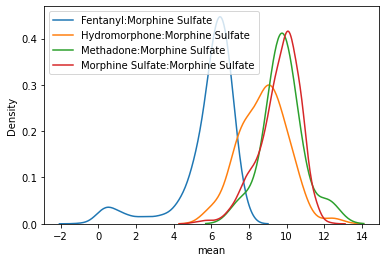

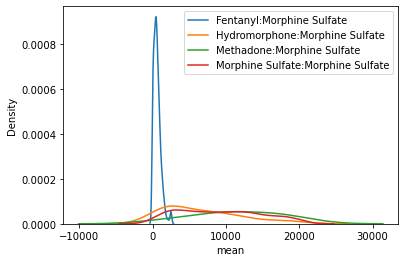

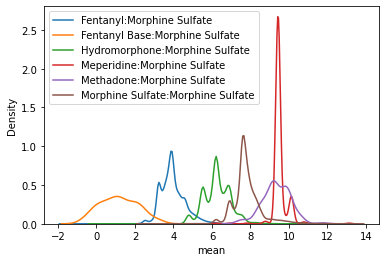

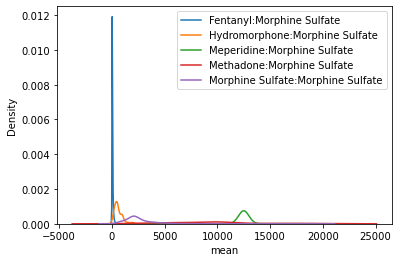

In [21]:
def plot(drip=True):

    if drip==True:
        df = drip_input_op
    else: 
        df = push_input_op
        
    group = df.groupby(['LABEL','HADM_ID']).agg({'AMOUNT':['mean','std','min','max']})

    labels = group.index.get_level_values('LABEL').unique()

    for label in labels:
        subset = group.loc[label]  # This gets the subset of the DataFrame corresponding to 'label'
        sns.kdeplot(np.log(subset.AMOUNT['mean']),label=f'{label}:Morphine Sulfate')

    plt.legend()  # To show the legend
    plt.show()



    for label in labels:
        if label != "Fentanyl Base":
            subset = group.loc[label]  # This gets the subset of the DataFrame corresponding to 'label'
            subset = subset[subset.AMOUNT['mean']<20000]
            sns.kdeplot(subset.AMOUNT['mean'],label=f'{label}:Morphine Sulfate')

    plt.legend()  # To show the legend
    plt.show()


plot()
plot(drip=False)

In [35]:
input_op[['STORETIME','STARTTIME', 'ENDTIME']]

,STORETIME,STARTTIME,ENDTIME
5888442,2127-11-29 16:26:00,NaN,NaN
5888443,2127-11-29 17:56:00,NaN,NaN
5888444,2127-11-29 17:56:00,NaN,NaN
5888445,2127-11-29 20:25:00,NaN,NaN
5888446,2127-11-29 20:25:00,NaN,NaN
...,...,...,...
3618947,2141-08-03 21:55:00,2141-08-03 22:00:00,2141-08-03 22:01:00
3618981,2147-08-31 03:28:00,2147-08-31 03:28:00,2147-08-31 03:29:00
3618986,2147-08-28 12:43:00,2147-08-28 12:00:00,2147-08-28 12:01:00
3618987,2147-08-29 12:55:00,2147-08-29 12:16:00,2147-08-29 15:04:00


In [55]:
push_input_op[push_input_op.HADM_ID==199911.0][['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'LABEL','AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME',
        'ORIGINALAMOUNT',
       'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM',
       'ORIGINALSITE']]


X[X.HADM_ID==199911.0]
# .iloc[:5000]
# .to_csv("Opioid Inputevent(Push).csv")
# 'STARTTIME', 'ENDTIME'

# push_input_op[push_input_op.HADM_ID.isin(surgery_hadm)].groupby(['LABEL','ORIGINALROUTE','AMOUNTUOM']
#                  ,dropna=False).agg({'HADM_ID':'nunique','AMOUNT':['mean','std','min','max']}).rename(columns={'HADM_ID':'Count'})

# push_input_op[push_input_op.HADM_ID.isin(surgery_hadm)].groupby(['LABEL','ORIGINALROUTE','AMOUNTUOM']
#                  ,dropna=False).agg({'HADM_ID':'nunique','AMOUNT':['mean','std','min',
#                         'max', ('25 quantile', lambda x: x.quantile(0.25)), 
#                         ('75 quantile', lambda x: x.quantile(0.75))] }).rename(columns={'HADM_ID':'Count'})


# merged_push_op[merged_push_op.HADM_ID.isin(X.HADM_ID)].groupby('OpioidDrug').agg({'HADM_ID':'nunique'})

# hadm_record[hadm_record.HADM_ID.isin(push_input_op.HADM_ID)]

,SUBJECT_ID,HADM_ID,ADMITTIME,AGE,DISCHTIME,DEATHTIME,INSURANCE,GENDER,ETHNICITY,RELIGION,...,PainScore_std,PainScore_count,BaselinePainScore_mean,BaselinePainScore_max,BaselinePainScore_min,BaselinePainScore_std,BaselinePainScore_N,Morbidities_N,Surgery,MORTARLITY


In [24]:
push_input_op[push_input_op.LABEL=="Fentanyl"].AMOUNT.describe()

count    408026.000000
mean        116.985872
std         176.947797
min           0.060000
25%          49.999999
50%          75.000000
75%         125.000000
max       20000.000000
Name: AMOUNT, dtype: float64

In [25]:
# X.BMI.describe()

In [ ]:
# hadm_record2.to_csv("X.csv")
# pd.get_dummies(hadm_record2,columns=['ETHNICITY','GENDER'])
# hadm_record2.columns
# hadm_record2 = pd.read_csv("X.csv",index_col=0)

In [ ]:
# Diag_dummy = pd.read_csv("Diag_dummy.csv",index_col=0)
# Diag_dummy = Diag_dummy.drop(["DIAG_SEQ_NUM","DIA_ICD9_CODE","ICD9",
# "DIAG_SHORT_TITLE","DIAG_LONG_TITLE","Category"],axis=1)

# Diag_dummy.columns

In [ ]:
# Diag_dummy = Diag_dummy.groupby("HADM_ID").agg({
#     'ICD9_NAME_Alcohol or drug abuse': 'sum',
#     'ICD9_NAME_Cancer': 'sum', 
#     'ICD9_NAME_Cerebrovascular Disease (stroke)': 'sum',
#     'ICD9_NAME_Chronic Kidney Disease': 'sum',
#     'ICD9_NAME_Chronic Pulmonary Disease': 'sum', 
#     'ICD9_NAME_Chronic anemia': 'sum',
#     'ICD9_NAME_Coagulopathy': 'sum', 
#     'ICD9_NAME_Congestive Heart Failure': 'sum',
#     'ICD9_NAME_Depression': 'sum', 
#     'ICD9_NAME_Diabetes': 'sum',
#     'ICD9_NAME_Fluid and electrolyte disorders': 'sum', 
#     'ICD9_NAME_Hypertension': 'sum',
#     'ICD9_NAME_Liver Disease': 'sum', 
#     'ICD9_NAME_Metastatic Carcinoma': 'sum',
#     'ICD9_NAME_Myocardial Infarction (heart attack)': 'sum', 
#     'ICD9_NAME_Obesity': 'sum',
#     'ICD9_NAME_Peripheral Vascular Disease': 'sum', 
#     'ICD9_NAME_Valvular Disease': 'sum',
#     'ICD9_NAME_Weight Loss': 'sum'
# })



# hadm_record2 = hadm_record2.merge(Diag_dummy,on="HADM_ID")

In [32]:
cv = input_cv.merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
mv = input_mv.merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')

mv = input_mv[input_mv.HADM_ID.isin(hadm_record.HADM_ID)].merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
cv = input_cv[input_cv.HADM_ID.isin(hadm_record.HADM_ID)].merge(D_ITEMS[['ITEMID','LABEL']],on='ITEMID',how='left')
cv = cv.drop('ROW_ID',axis=1)
cv = cv.dropna(subset=['LABEL'])
mv = mv.drop('ROW_ID',axis=1)
cv_mv = pd.concat([cv,mv])

opioid_list = "fentanyl|hydromorphone|methadone hydrochloride|meperidine|morphine|methadone|oxycodone|oxycontin|tramadol|percocet|ultram|opium"


op_ch,chart_op, input_op = findDrug(opioid_list,cv,mv)



In [96]:
input_op[input_op.HADM_ID.isin(surgery_hadm)].groupby(["LABEL","AMOUNTUOM","ORDERCATEGORYNAME",
                  "ORIGINALROUTE","ITEMID"],
                 dropna=False).agg({'HADM_ID':'nunique','AMOUNT':['min','max']})


HADM_ID  \
                                                                             nunique   
LABEL                    AMOUNTUOM ORDERCATEGORYNAME ORIGINALROUTE    ITEMID           
Fentanyl                 mcg       01-Drips          NaN              221744       1   
                                   05-Med Bolus      NaN              221744    2193   
                                   NaN               Intravenous Push 30118     1053   
                         mg        01-Drips          NaN              221744     349   
                         NaN       NaN               IV Drip          30118     1073   
Fentanyl (Conc)          mcg       NaN               Intravenous Push 30149       48   
                         NaN       NaN               IV Drip          30149       53   
Fentanyl (Concentrate)   mcg       01-Drips          NaN              225942       2   
                         mg        01-Drips          NaN              225942     898   
Fentanyl Base            ml        NaN               Intravenous Push 30150       48   
                         NaN       NaN               Intravenous Push 30150       32   
Hydromorphone (Dilaudid) dose      05-Med Bolus      NaN              221833       2   
                         mcg       05-Med Bolus      NaN              221833       1   
                         mg        01-Drips          NaN              221833      20   
                                   05-Med Bolus      NaN              221833    2287   
Meperidine (Demerol)     mg        05-Med Bolus      NaN              225973     284   
Methadone                ml        NaN               NaN              46725        1   
Methadone Hydrochloride  mg        01-Drips          NaN              227520       7   
                                   05-Med Bolus      NaN              227520      46   
Morphine                 ml        NaN               NaN              30153        1   
Morphine Sulfate         mg        01-Drips          NaN              225154     291   
                                   05-Med Bolus      NaN              225154    3754   
                                   NaN               Intravenous Push 30126      371   
                         NaN       NaN               IV Drip          30126      443   

                                                                                   AMOUNT  \
                                                                                      min   
LABEL                    AMOUNTUOM ORDERCATEGORYNAME ORIGINALROUTE    ITEMID                
Fentanyl                 mcg       01-Drips          NaN              221744    24.999995   
                                   05-Med Bolus      NaN              221744 -2699.999919   
                                   NaN               Intravenous Push 30118      0.000000   
                         mg        01-Drips          NaN              221744    -3.720000   
                         NaN       NaN               IV Drip          30118           NaN   
Fentanyl (Conc)          mcg       NaN               Intravenous Push 30149      0.000000   
                         NaN       NaN               IV Drip          30149           NaN   
Fentanyl (Concentrate)   mcg       01-Drips          NaN              225942     1.000000   
                         mg        01-Drips          NaN              225942    -0.753945   
Fentanyl Base            ml        NaN               Intravenous Push 30150      0.000000   
                         NaN       NaN               Intravenous Push 30150      0.000000   
Hydromorphone (Dilaudid) dose      05-Med Bolus      NaN              221833     1.000000   
                         mcg       05-Med Bolus      NaN              221833   125.000010   
                         mg        01-Drips          NaN              221833     0.002083   
                                   05-Med Bolus      NaN              221833   -69.000000   
Meperidine (Demerol)     m

In [99]:

# input_op[input_op.]
# input_op[input_op.AMOUNT>900000][['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'LABEL','AMOUNT',
#        'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CHARTTIME',
#         'ORIGINALAMOUNT',
#        'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM',
#        'ORIGINALSITE',  'STARTTIME', 'ENDTIME']]




# 看区间
bins = pd.cut(input_op[(input_op.LABEL=="Hydromorphone (Dilaudid)") & (input_op.ORDERCATEGORYNAME=="05-Med Bolus") 
        & (input_op.AMOUNTUOM=='mg') ].AMOUNT,bins=[-100,0,1,2,5,10,15,20,50,150,500,1000])
frequency = bins.value_counts(sort=False)
print("Hydromorphone (Dilaudid), Unit: mg, Route: IV_push\n",frequency,"\n")


bins = pd.cut(input_op[(input_op.LABEL=="Meperidine (Demerol)") & (input_op.ORDERCATEGORYNAME=="05-Med Bolus") 
        & (input_op.AMOUNTUOM=='mg') ].AMOUNT,bins=[-0.01,0,10,20,30,50,55])
frequency = bins.value_counts(sort=False)
print("Meperidine (Demerol), Unit: mg, Route: IV_push\n",frequency,"\n")



bins = pd.cut(push_input_op[(push_input_op.HADM_ID.isin(surgery_hadm)) & (push_input_op.LABEL=="Fentanyl")].AMOUNT/1000,bins=[0,1,2,3,4,5,6,7,8,9,10])
frequency = bins.value_counts(sort=False)
print("Fentanyl, Unit: mg, Route: IV_push\n",frequency,"\n")



bins = pd.cut(push_input_op[(push_input_op.HADM_ID.isin(surgery_hadm))&
                            (push_input_op.LABEL=="Morphine Sulfate")].AMOUNT/1000,
              bins=[0,5,10,25,50,100,150,250,500,750,1000,1500,2000,2500,3000])
frequency = bins.value_counts(sort=False)
print("Morphine Sulfate, Unit: mg, Route: IV_push\n",frequency,"\n")



input_op[(input_op.LABEL=="Hydromorphone (Dilaudid)") &
         (input_op.ORDERCATEGORYNAME=="05-Med Bolus") & (input_op.AMOUNT>10)][['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'LABEL','AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CHARTTIME',
        'ORIGINALAMOUNT',
       'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM',
       'ORIGINALSITE',  'STARTTIME', 'ENDTIME']]




push_input_op[(push_input_op.HADM_ID.isin(surgery_hadm)) & 
    (push_input_op.LABEL=="Fentanyl") & (push_input_op.AMOUNT>6999)][['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'LABEL','AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CHARTTIME',
        'ORIGINALAMOUNT',
       'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM',
       'ORIGINALSITE',  'STARTTIME', 'ENDTIME']]

# input_op[input_op.HADM_ID==162590]


# push_part = transform(input_op[(input_op.HADM_ID.isin(drip_push_id)) & (input_op.AMOUNT.notna()) & 
#                ((input_op.ORIGINALROUTE=="Intravenous Push")|(input_op.ORDERCATEGORYNAME=="05-Med Bolus"))])
# drip_part = transform(input_op[(input_op.HADM_ID.isin(drip_push_id)) & (input_op.AMOUNT.notna()) &
#                ((input_op.ORIGINALROUTE=="IV Drip")|(input_op.ORDERCATEGORYNAME=="01-Drips"))])

# # print(drip_part.shape,push_part.shape,
# #      drip_part.AMOUNT.describe(),
# #      push_part.AMOUNT.describe())


# #  - drip_part.STARTTIME
# (pd.to_datetime(drip_part.ENDTIME) - pd.to_datetime(drip_part.STARTTIME)).describe()


# drip_part = drip_part.replace(['Fentanyl (Concentrate)','Fentanyl (Conc)','Fentanyl Drip'],'Fentanyl')
# drip_part.groupby('LABEL',dropna=False).agg({'AMOUNT':['mean','std','min','max']})
# # .HADM_ID.nunique()


# [datetime.datetime.strptime(drip_part.ENDTIME[i], "%Y-%m-%d %H:%M:%S")  for i in range(drip_part.shape[0])]
# drip_part.ENDTIME

# input_op[input_op.HADM_ID.isin(drip_push_id)].groupby(['ORDERCATEGORYNAME','ORIGINALROUTE'],dropna=False).nunique()
# input_op.groupby('ORIGINALROUTE',dropna=False).nunique()

# .AMOUNTUOM.unique()


# input_op


# cv_mv
# cv_mv.LABEL.unique()

# D_ITEMS[(D_ITEMS.LABEL.str.lower().str.contains("oxycontin|oxypro|longtec|reltebon|zomestine|oxycodone|percocet"))]

# D_ITEMS[(D_ITEMS.LINKSTO=='inputevents_cv') | (D_ITEMS.LINKSTO=='inputevents_mv')]
# .to_csv("Inputevent_label.csv")

# cv_mv[(cv_mv.LABEL.str.lower().str.contains("oxycontin|oxypro|longtec|reltebon|zomestine|oxycodone|percocet"))]
#       & (cv_mv.HADM_ID.isin(hadm_record.HADM_ID))]



# op_ch,chart_op, input_op = findDrug(opioid_list,cv,mv)
# input_op.LABEL = input_op.LABEL.replace(['Fentanyl (Concentrate)',
#                                          'Fentanyl (Conc)'],'Fentanyl')

# input_op2 = transform(input_op)



# count = cv_mv.groupby(['LABEL','ORIGINALROUTE','ORDERCATEGORYNAME','ORDERCATEGORYDESCRIPTION','AMOUNTUOM'],dropna=False).agg({'HADM_ID':'nunique'})
# # count.sort_values(by='HADM_ID',ascending=False)

# count.sort_values(by='HADM_ID',ascending=False).to_csv('temporary.csv')
# cv_mv[cv_mv.LABEL=='T4']

# count
# input_op2.LABEL.unique()

# len(surgery_hadm)


# drug[(drug.DRUG.str.lower().str.contains(opioid_list)) 
#      & (drug.HADM_ID.isin(hadm_record.HADM_ID))].groupby(["DRUG","DRUG_TYPE",
#                                                           "DOSE_UNIT_RX","ROUTE" ]).agg({"HADM_ID":"nunique"}).to_csv("pres_op.csv")

Hydromorphone (Dilaudid), Unit: mg, Route: IV_push
 (-100, 0]         89
(0, 1]         17063
(1, 2]           116
(2, 5]          1909
(5, 10]           74
(10, 15]          32
(15, 20]           0
(20, 50]           7
(50, 150]          2
(150, 500]         0
(500, 1000]        1
Name: AMOUNT, dtype: int64 

Meperidine (Demerol), Unit: mg, Route: IV_push
 (-0.01, 0.0]      9
(0.0, 10.0]       4
(10.0, 20.0]    383
(20.0, 30.0]     30
(30.0, 50.0]      0
(50.0, 55.0]      4
Name: AMOUNT, dtype: int64 

Fentanyl, Unit: mg, Route: IV_push
 (0, 1]     141940
(1, 2]        120
(2, 3]         31
(3, 4]          3
(4, 5]          4
(5, 6]          1
(6, 7]          1
(7, 8]          0
(8, 9]          0
(9, 10]         0
Name: AMOUNT, dtype: int64 

Morphine Sulfate, Unit: mg, Route: IV_push
 (0, 5]          29580
(5, 10]          5645
(10, 25]         1483
(25, 50]          408
(50, 100]          95
(100, 150]         15
(150, 250]         12
(250, 500]          4
(500, 750]          1
(750

,SUBJECT_ID,HADM_ID,ITEMID,LABEL,AMOUNT,AMOUNTUOM,RATE,RATEUOM,STORETIME,CHARTTIME,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE,STARTTIME,ENDTIME
11331470,6761,141907.0,30118,Fentanyl,7000.0,mcg,NaN,NaN,2135-09-04 22:21:00,2135-09-04 22:00:00,2500.0,mcg,Intravenous Push,4.0,ml/hr,NaN,NaN,NaN


In [43]:

# drug
input_op[input_op.HADM_ID.isin(X.HADM_ID)].HADM_ID.nunique()
# .groupby(['LABEL','ORIGINALROUTE',
#                   'ORDERCATEGORYNAME',
#                   'ORDERCATEGORYDESCRIPTION']
#                  ,dropna=False).agg({'HADM_ID':'nunique'}).rename(columns={'HADM_ID':'Count'})

# input_op[(input_op.LABEL=='Morphine Sulfate') & 
# (input_op.ORIGINALROUTE=='Intravenous')][['HADM_ID','LABEL', 'AMOUNT',
#        'AMOUNTUOM', 'ORIGINALAMOUNT',
#        'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM',
#        'ORIGINALSITE','STARTTIME', 'ENDTIME','SECONDARYORDERCATEGORYNAME']][:50]
   
    
# input_op.groupby(['LABEL','AMOUNTUOM'],dropna=False).HADM_ID.nunique()

# input_op[(input_op.LABEL=='Fentanyl') & (input_op.AMOUNTUOM.isna())].AMOUNT.unique() # 全是nan
# input_op[(input_op.LABEL=='Fentanyl') & (input_op.AMOUNTUOM=='mcg')]


# input_op[(input_op.LABEL=='Morphine Sulfate') & (input_op.ORIGINALROUTE=='Intravenous')]
# # input_op[(input_op.LABEL=='Morphine Sulfate') & (input_op.ORIGINALROUTE=='Intravenous Push')]
# input_op[(input_op.LABEL=='Morphine Sulfate') & (input_op.ORIGINALROUTE=='IV Drip')]

# input_op[(input_op.LABEL=='Fentanyl Drip') ]

          

7757